# K-means clustering

## import library

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [369]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))
print(x.shape, y.shape, feature.shape)
print(feature.dtype)

number of data : 1000
number of feature : 2
(1000,) (1000,) (1000, 2)
float64


## plot the input data

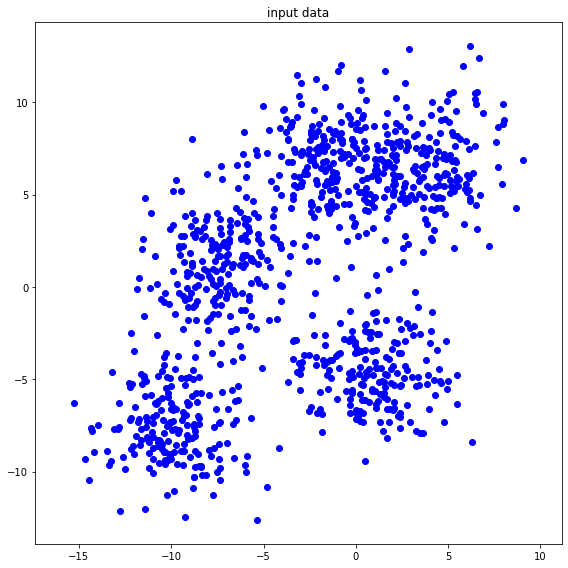

In [370]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x,y, 'o', color = 'blue')
plt.axis('equal')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [371]:
def compute_distance(feature, center):
    # data here has (1000,2) shape,   center.shape should be (1,2) shape or (2,)
    data_num = np.size(feature,0)
    center_ = center.reshape(1,2)

    # feature.shape = (1000,2)
    distance = feature - center_
    distance = distance**2
    distance = np.sum(distance, axis = 1).reshape(data_num,1)
    
    return distance
#print(compute_distance(feature,np.array([(2,5)])).shape)

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [372]:
def compute_centroid(feature, label_feature, value_label):
    data_num = feature.shape[0]
    m = feature.shape[1]
    # label_temp.shape = (n,1)
    label_temp = label_feature - value_label
    # temp_4_xor.shape = (n,1)
    temp_4_xor = np.ones((data_num,1))
    # In label_temp, only zeros convert to True
    only_selected_label = np.logical_xor(label_temp, temp_4_xor).reshape((data_num,1))
    # True element count
    true_count = np.sum( only_selected_label)
    
    cen = feature * only_selected_label
    cen = np.sum(cen, axis = 0) // true_count
    
    
    
    #cen = cen.reshape((1,m))
    
    # now we have to pick a dot which is the most close dot from the cen
    
    #close_dot = feature - cen
    #close_dot = close_dot ** 2
  
    #close_dot = np.sum(close_dot, axis = 1)
    

    #min_idx = np.argmin(close_dot)

    #centroid = feature[min_idx].reshape((1,m))
  
    
    
    centroid = cen
            
    
    
    
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [373]:
def compute_label(distance):
    data_num = distance.shape[0]
    result = []
    
    for i in range(data_num):
        result.append(np.argmin(distance[i]))
    index_label_feature = np.array(result).reshape((data_num,1))
    
    return index_label_feature


In [374]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 5000

label_cluster = [0,1,2,3,4]
# Initial clustering (1000,1)
label_feature = np.array([0]*number_data)
for i in range(feature.shape[0]):
    if feature[i][0]<-4 and feature[i][1] < -4:
        label_feature[i] = 0
    elif feature[i][0]>=-4 and feature[i][1] < 2:
        label_feature[i] = 1
    elif feature[i][0] < -3 and -4 <= feature[i][1]:
        label_feature[i] = 2
    elif -3 <= feature[i][0] <  3.5 and 2 <= feature[i][1]:
        label_feature[i] = 3
    else:
        label_feature[i] = 4

for i in range(400):
    label_feature[2*i] = (6*i) % 5
label_feature = label_feature.reshape(number_data, 1)

# ===================================================
#compute_distance(feature, center)  ==> n x 1
#compute_centroid(feature, label_feature, value_label) ==> 1 x m
#compute_label(distance) n x k ==> n x 1

In [375]:
#(1000,5)
distance            = np.zeros(shape=(number_data, number_cluster))
#(5,2)
centroid            = np.zeros(shape=(number_cluster, number_feature))
#(50000, 1)
loss_iteration      = np.zeros(shape=(number_iteration, 1))
#(50000,5,2)
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))


for i in range(number_iteration):
    
    for k in range(len(label_cluster)):
        # now_centroid.shape = (1,2)
        now_centroid = compute_centroid(feature, label_feature, label_cluster[k])
        # save
        centroid[k] = now_centroid
        
        
        distance[:,k] = compute_distance(feature, now_centroid).reshape(number_data,)
        
    #update label_feature
    #print(label_feature.reshape(label_feature.shape[0],))
    #print(distance)
    label_feature = compute_label(distance)
    #print(label_feature.reshape(label_feature.shape[0],))
    
    #update cetroid_iteration
    centroid_iteration[i] = centroid
    #print(centroid)
    # update loss
    loss = 0
    for j in range(len(distance)):
        loss += min(distance[j])
    loss /= number_data
    
    # save loss_iteration
    loss_iteration[i] = loss
    if i % 300 == 0 or i == number_iteration - 1:
        print("iterrrr", i," = ",loss)
        


iterrrr 0  =  17.74629181819768
iterrrr 300  =  8.44847614876834
iterrrr 600  =  8.44847614876834
iterrrr 900  =  8.44847614876834
iterrrr 1200  =  8.44847614876834
iterrrr 1500  =  8.44847614876834
iterrrr 1800  =  8.44847614876834
iterrrr 2100  =  8.44847614876834
iterrrr 2400  =  8.44847614876834
iterrrr 2700  =  8.44847614876834
iterrrr 3000  =  8.44847614876834
iterrrr 3300  =  8.44847614876834
iterrrr 3600  =  8.44847614876834
iterrrr 3900  =  8.44847614876834
iterrrr 4200  =  8.44847614876834
iterrrr 4500  =  8.44847614876834
iterrrr 4800  =  8.44847614876834
iterrrr 4999  =  8.44847614876834


In [376]:
# ==============iteration for 10 clusters===============
# assign the number of clusters and iterations
number_cluster_2      = 10
number_iteration_2  = 5000

label_cluster_2 = [0,1,2,3,4,5,6,7,8,9]
# Initial clustering (1000,1)
label_feature_2 = np.array([0]*number_data)

for i in range(feature.shape[0]):
    if feature[i][0]<-4 and feature[i][1] < -4:
        label_feature_2[i] = 0
        
    elif -4<= feature[i][0] < 2 and feature[i][1] < 2:
        label_feature_2[i] = 1
    elif 2 <= feature[i][0] and feature[i][1] < 2:
        label_feature_2[i] = 2
        
    elif feature[i][0] < -3 and -4 <= feature[i][1] < 0:
        label_feature_2[i] = 3
    elif feature[i][0] < -3 and 0 <= feature[i][1]:
        label_feature_2[i] = 4
        
        
    elif -3 <= feature[i][0] <  1 and 2 <= feature[i][1] < 6.5:
        label_feature_2[i] = 5
    elif -3 <= feature[i][0] <  1 and 6.5 <= feature[i][1]:
        label_feature_2[i] = 6
    
    elif 1 <= feature[i][0] < 3 and 2 <= feature[i][1]:
        label_feature_2[i] = 7
        
    elif 3 <= feature[i][0]  and 2 <= feature[i][1] < 6:
        label_feature_2[i] = 8
    else:
        label_feature_2[i] = 9

for i in range(400):
    label_feature_2[2*i] = (13*i) % 10

label_feature_2 = label_feature_2.reshape(number_data, 1)

In [377]:
#(1000,10)
distance_2            = np.zeros(shape=(number_data, number_cluster_2))
#(5,2)
centroid_2            = np.zeros(shape=(number_cluster_2, number_feature))
#(50000, 1)
loss_iteration_2      = np.zeros(shape=(number_iteration_2, 1))
#(50000,5,2)
centroid_iteration_2  = np.zeros(shape=(number_iteration_2, number_cluster_2, number_feature))


for i in range(number_iteration_2):
    
    for k in range(len(label_cluster_2)):
        # now_centroid.shape = (1,2)
        now_centroid_2 = compute_centroid(feature, label_feature_2, label_cluster_2[k])
        # save
        centroid_2[k] = now_centroid_2
        
        
        distance_2[:,k] = compute_distance(feature, now_centroid_2).reshape(number_data,)
        
    #update label_feature
    #print(label_feature.reshape(label_feature.shape[0],))
    #print(distance)
    label_feature_2 = compute_label(distance_2)
    #print(label_feature.reshape(label_feature.shape[0],))
    
    #update cetroid_iteration
    centroid_iteration_2[i] = centroid_2
    #print(centroid)
    # update loss
    loss_2 = 0
    for j in range(len(distance_2)):
        loss_2 += min(distance_2[j])
    loss_2 /= number_data
    
    # save loss_iteration
    loss_iteration_2[i] = loss_2
    
    if i % 300 == 0 or i == number_iteration_2 - 1:
        print("iterrrr", i," = ",loss_2)


iterrrr 0  =  16.213537190195563
iterrrr 300  =  5.728855767848739
iterrrr 600  =  5.728855767848739
iterrrr 900  =  5.728855767848739
iterrrr 1200  =  5.728855767848739
iterrrr 1500  =  5.728855767848739
iterrrr 1800  =  5.728855767848739
iterrrr 2100  =  5.728855767848739
iterrrr 2400  =  5.728855767848739
iterrrr 2700  =  5.728855767848739
iterrrr 3000  =  5.728855767848739
iterrrr 3300  =  5.728855767848739
iterrrr 3600  =  5.728855767848739
iterrrr 3900  =  5.728855767848739
iterrrr 4200  =  5.728855767848739
iterrrr 4500  =  5.728855767848739
iterrrr 4800  =  5.728855767848739
iterrrr 4999  =  5.728855767848739


## plot the results

In [378]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
  

    plt.plot(x,y, 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

In [379]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
   
    plt.plot(np.arange(1,number_iteration+1), loss_iteration, '-', color = 'red')
    plt.xlabel('iteration') 
    plt.ylabel('loss')
    plt.tight_layout() 
    plt.show()

In [380]:

def plot_centroid(centroid_iteration):
    # centroid_iteration.shape = (number_itaration, number_cluster, 2)
    num_iter = centroid_iteration.shape[0]
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    
    
    
    
    
    initial_x, initial_y = centroid_iteration[0][:,0], centroid_iteration[0][:,1]
    final_x, final_y = centroid_iteration[num_iter-1][:,0], centroid_iteration[num_iter-1][:,1]
    
    now_x = []
    now_y = []
    
    for i in range(centroid_iteration.shape[1]):
        now_x = centroid_iteration[:,i,0]
        now_y = centroid_iteration[:,i,1]
        # now_x, now_y. shape = (number_iteration, ) 
        plt.plot(now_x, now_y,'-',color= 'C'+str(i), label = 'cluster = '+str(i))
        
    
    
    
    
    
    
    
    plt.plot(initial_x, initial_y, 'o', color = 'blue', label='initial')
    plt.plot(final_x, final_y, 's', color = 'red', label='final')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [381]:
def plot_cluster(feature, label_feature, label_cluster):
    # feature (1000,2)
    # label_feature (1000, 1)
    # label_cluster is list, len = number_cluster
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
  
    plt.title('cluster')
    used_colors = []
    
    now_x = []
    now_y = []
    
    for i in range(len(label_cluster)):
        now_x=[]
        now_y=[]
        for j in range(label_feature.shape[0]):
            if label_feature[j][0] == label_cluster[i]:
                now_x.append(feature[j][0])
                now_y.append(feature[j][1])
        plt.scatter(now_x, now_y,c= 'C'+str(i+1), label = 'cluster_'+str(i))
    
        
    cmap = cm.colors.ListedColormap(used_colors)
    
    cbar = plt.colorbar(ticks=np.linspace(0, len(used_colors), 1))
    cbar.ax.set_yticklabels("0")
    
    #plt.colorbar()
    plt.tight_layout()
    plt.show()








***

# results

***

1. plot the input data

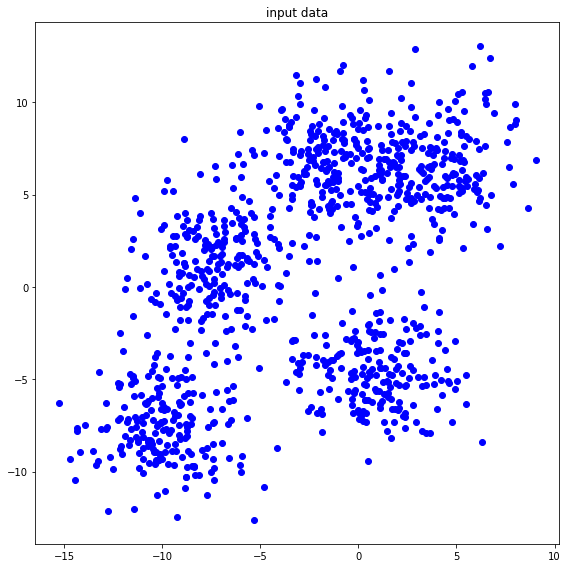

In [382]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

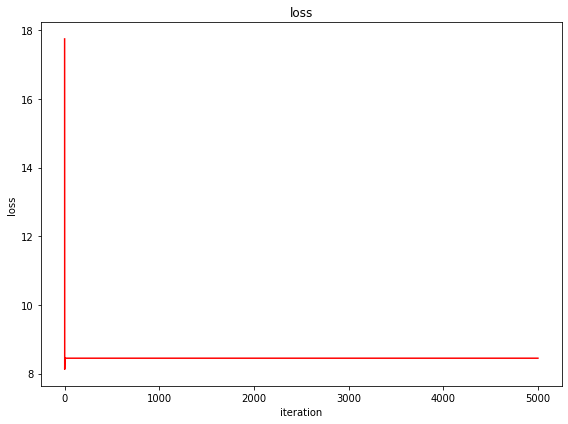

In [383]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

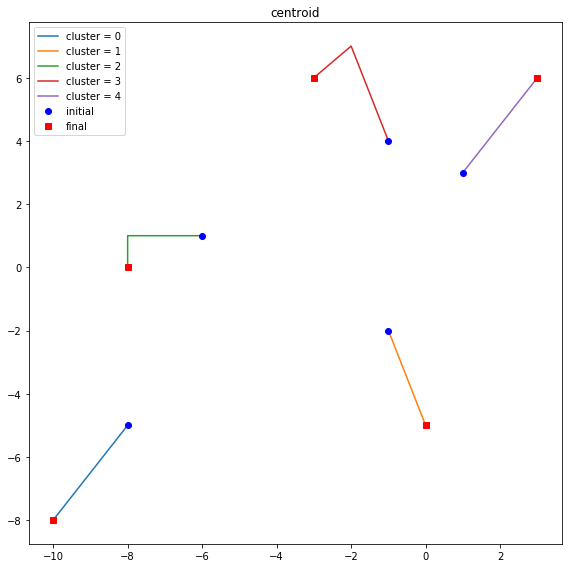

In [384]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

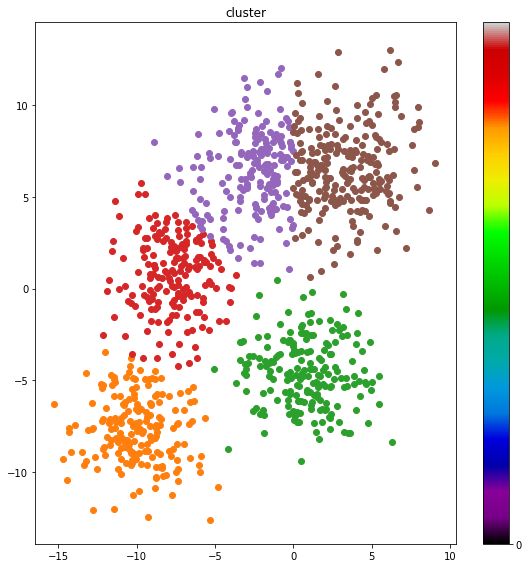

In [385]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

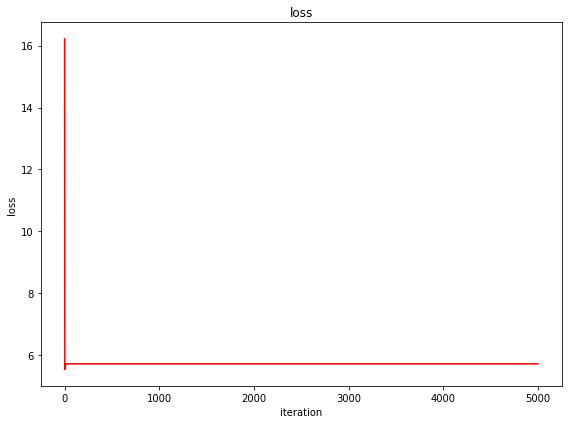

In [386]:
plot_loss_curve(loss_iteration_2)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

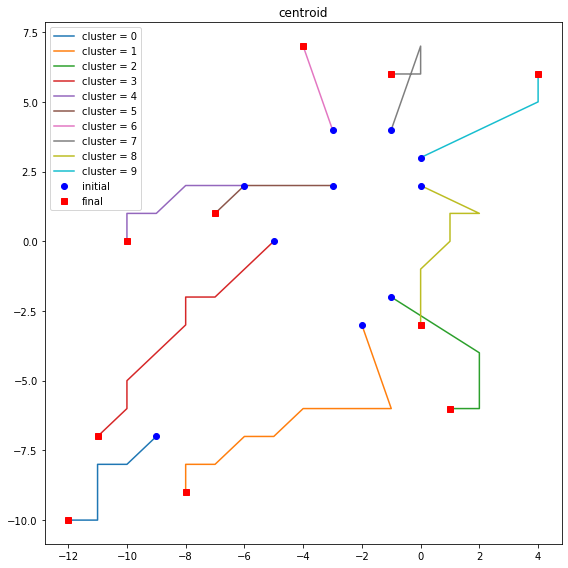

In [387]:
plot_centroid(centroid_iteration_2)

***

7. plot the final clustering result with the number of clusters being 10

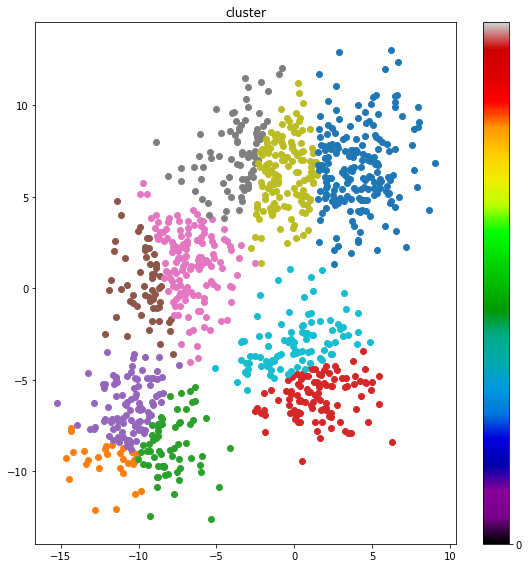

In [388]:
plot_cluster(feature, label_feature_2, label_cluster_2)

***